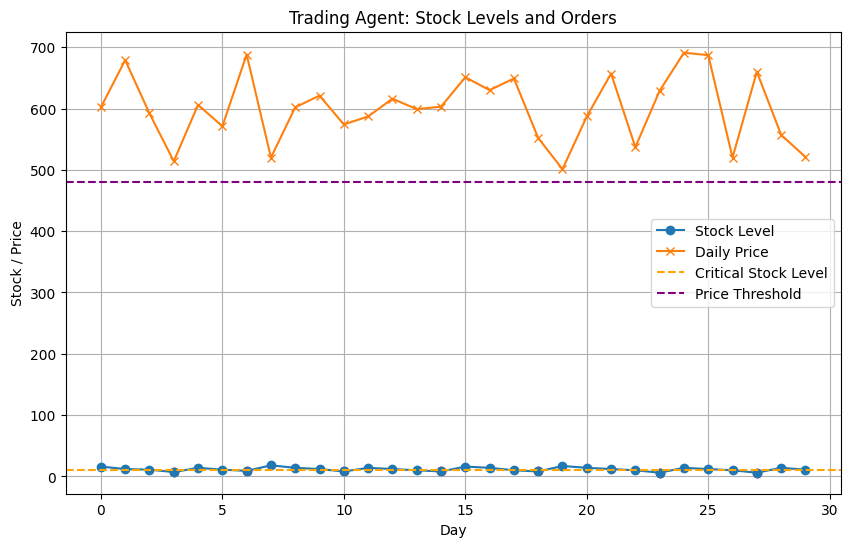

In [2]:
import numpy as np
import matplotlib.pyplot as plt


AVERAGE_PRICE = 600
PRICE_DISCOUNT_THRESHOLD = 0.8
CRITICAL_STOCK_LEVEL = 10
MINIMUM_ORDER_QUANTITY = 10
SIMULATION_DAYS = 30


np.random.seed(42)
daily_prices = np.random.randint(500, 700, size=SIMULATION_DAYS)
daily_stock_levels = np.random.randint(5, 30, size=SIMULATION_DAYS)


orders = []
current_stock = daily_stock_levels[0]
stock_history = [current_stock]


for day in range(SIMULATION_DAYS):
    price = daily_prices[day]
    stock = current_stock

    if price < AVERAGE_PRICE * PRICE_DISCOUNT_THRESHOLD and stock > CRITICAL_STOCK_LEVEL:
        tobuy = 15
    elif stock < CRITICAL_STOCK_LEVEL:
        tobuy = MINIMUM_ORDER_QUANTITY
    else:
        tobuy = 0


    current_stock = stock + tobuy - np.random.randint(1, 5)
    current_stock = max(current_stock, 0)
    orders.append(tobuy)
    stock_history.append(current_stock)


days = np.arange(SIMULATION_DAYS)

plt.figure(figsize=(10, 6))


plt.plot(days, stock_history[:-1], label="Stock Level", marker="o")


plt.plot(days, daily_prices, label="Daily Price", marker="x")


for day, order in enumerate(orders):
    if order > 0:
        plt.scatter(day, stock_history[day], color="red", label="Order Placed" if day == 0 else "")

plt.axhline(CRITICAL_STOCK_LEVEL, color="orange", linestyle="--", label="Critical Stock Level")
plt.axhline(AVERAGE_PRICE * PRICE_DISCOUNT_THRESHOLD, color="purple", linestyle="--", label="Price Threshold")
plt.xlabel("Day")
plt.ylabel("Stock / Price")
plt.title("Trading Agent: Stock Levels and Orders")
plt.legend()
plt.grid()
plt.show()